# Лекция 3. Основы Cтатистики ч.2

## Содержание
[3.1 Кластерный анализ методом k - средних](#3.1)  
[3.2 Может ли кластерный анализ "ошибаться"?](#3.2)  
[3.3 ](#3.3)   
[3.4 ](#3.4)  
[3.5 ](#3.5)  



## 3.1 Кластерный анализ методом k - средних<a id='3.1'></a>

### Основные определения и тезисы:   
**Кластерный анализ** - анализирует наблюдения (по строкам). Определяет есть ли в данных группировка наблюдений по разным кластерам, а также сколько таких кластеров можно выделить.  

**Центроиды** - геометрические центры предполагаемых кластеров с координатами:  
[срeднее значение всех наблюдений кластера по оси X ; срeднее значение всех наблюдений кластера по оси Y]  

**Внутригрупповая сумма квадратов** - сумма квадратов отклонений каждого наблюдения от центроида кластера.  

**Общая внутригрупповая сумма квадратов** - сумма внутригрупповых сумм квадратов.  

**Виды кластеризации**:  
* **k-means**  
Алгоритм:  
1) Решается на какое количество кластеров будут поделены наблюдения;  
2) Случайно выбираются начальные позиции центроидов кластера;  
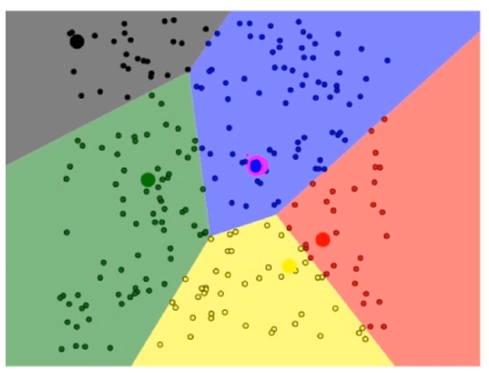
3) Для каждого наблюдения определяется, к какому центроиду оно ближе всего;  
4) Обновляются позиции центроидов (среднее по каждой переменной для группы);  
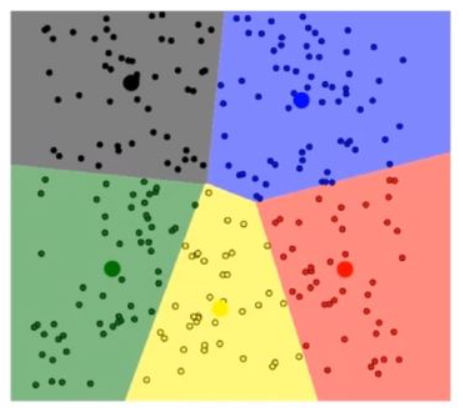  
5) Снова определяются принадлежности наблюдений(п.3). Если они изменились, то повторяется п. 4, иначе - алгоритм сошелся.  

В методе существует элемент случайности. При многократном повторении кластеризации на одних и тех же данных можно получить различные варианты кластерного решения. Чем менее явно представлена в данных кластерзация наблюдений, тем более существенными могут оказаться различия.  

Возможно метод сойдется не очень удачно: метод “увяз” в локальном минимуме. Решения:  
1) Начальные точки брать наиболее далеко друг от друга;  
2) Провести кластерный анализ много раз с разными начальными позициями (Если каждый раз из разных случайных начальных положений центроидов, кластерный анализ приходит в одно и то же положение, скорее всего, это не случайно).  

Для того, чтобы выяснить, какое число кластеров оптимально, можно многократно проводить кластерный анализ. Каждый раз выделяя разное кол-во кластеров и записывая значение общей внутрикластерной суммы квадратов.  
Если добавление одного кластера в данные **значительно понижает общую сумму квадратов**, то в увеличении числа кластеров есть смысл.  
Если последующее увеличение кластеров уже **не оказывает сильного влияния**, значит оптимальное число кластеров найденно.  
Если при увеличении числа кластеров идет **плавное снижение общей внтуригрупповой суммы квадратов**, значит в данных нет явной кластерной структуры.  

* **Иерахическая кластеризация** [# глава 3.4](#3.4)  

**Анализ главных компонент(PCA)** - анализирует наблюдения (по столбцам). Используется для снижения размерности набора данных. Преобразовывет взаимосвязанные переменные в независимую переменную(главная компонента). [# глава 3.5](#3.5)  

### Примеры:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
""" Пример кластерного анализа на датасете iris """
iris_df = pd.read_csv("data_iris.csv", index_col=0)
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


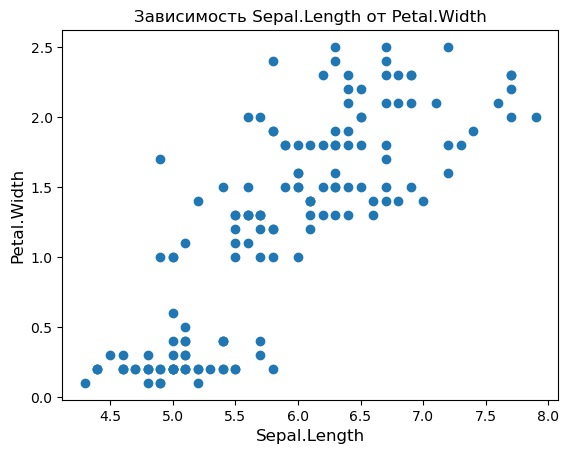

In [12]:
# визуализация данных
plt.title('Зависимость Sepal.Length от Petal.Width', fontsize=12)
plt.xlabel('Sepal.Length', fontsize=12)
plt.ylabel('Petal.Width', fontsize=12)

plt.scatter(iris_df["Sepal.Length"], iris_df["Petal.Width"])

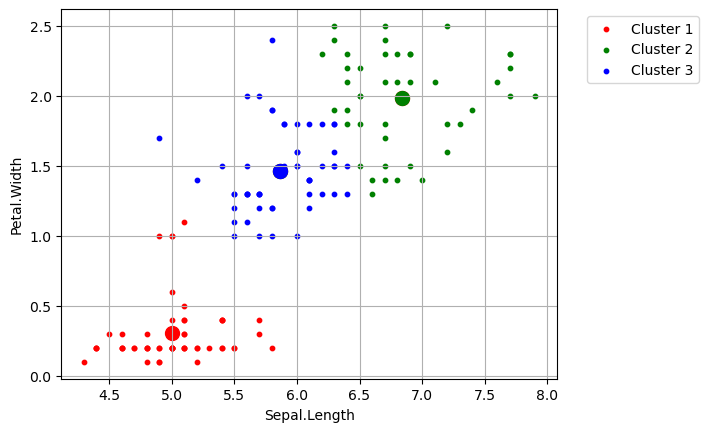

In [31]:
import warnings
warnings.filterwarnings('ignore')

# определяется количество кластеров 
clusters =('red', 'green', 'blue') # цвета для легенды графика
n_clusters = len(clusters)

# деление на кластеры
X = iris_df[["Sepal.Length", "Petal.Width"]].values
kmean_model = KMeans(n_clusters=n_clusters, init ='k-means++', max_iter=300, n_init=10, random_state=0)
y= kmean_model.fit_predict(X)

# визуализация групп и их центроидов
for i, color in enumerate(clusters):
    plt.scatter(X[y==i, 0], X[y==i, 1], s=10, c=color, label = f'Cluster {i+1}')
    plt.scatter(kmean_model.cluster_centers_[i:, 0], kmean_model.cluster_centers_[i:, 1], s=100, c=color)   
    
# заголовки
plt.xlabel("Sepal.Length")
plt.ylabel("Petal.Width")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.show()

Координаты центроида: (3.0, 5.0)


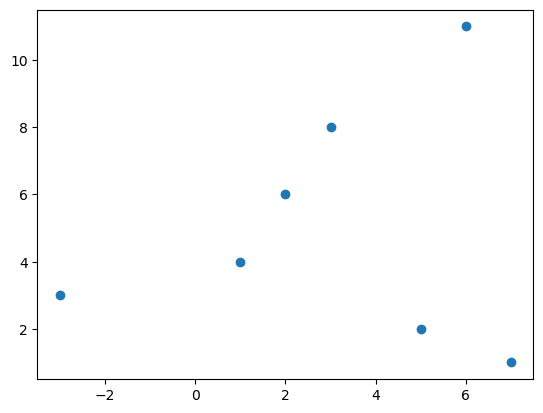

In [21]:
""" Рассмотрим пример данных, где каждое наблюдение характеризуется двумя переменными X и Y. 
    Рассчитайте координаты центроида наблюдений, изображенных на графике. 
    В поле для ответа введите координаты получившейся точки. """
x = [-3, 1, 2, 3, 5, 6, 7]
y = [3, 4, 6, 8, 2, 11, 1]
plt.scatter(x , y)

print(f"Координаты центроида: {np.mean(x),  np.mean(y)}")

## 3.2 Может ли кластерный анализ "ошибаться"?<a id="3.2"></a>